In [1]:
import LinAlg as LA
import numpy as np
import matplotlib.pyplot as plt
import DataIO as io
import Debug
import random

In [2]:
# Function to generate random points within the box (1,1,1) to (2,2,2)
def generate_random_points(num_points: int):
    points = []
    for _ in range(num_points):
        x = random.uniform(1, 2)
        y = random.uniform(1, 2)
        z = random.uniform(1, 2)
        points.append(LA.Vector(x, y, z))
    return points

# Generate 10 random points
random_points = generate_random_points(10)

# Print the generated points
for point in random_points:
    print(point)


theta = np.pi / 4  # 45 degrees rotation around Z-axis
phi = np.pi / 6    # 30 degrees rotation around Y-axis
translation = LA.Vector(0.5, 0.5, 0.5)  # Translation vector

transformation_matrix = Debug.create_transformation_matrix(theta, phi, translation)
print(transformation_matrix)


Vector(1.12, 1.56, 1.38)
Vector(1.15, 1.43, 1.49)
Vector(1.98, 1.68, 1.80)
Vector(1.42, 1.37, 1.35)
Vector(1.17, 1.23, 1.14)
Vector(1.31, 1.00, 1.51)
Vector(1.41, 1.70, 1.71)
Vector(1.53, 1.85, 1.07)
Vector(1.20, 1.04, 1.68)
Vector(1.34, 1.36, 1.31)
[[ 0.6124 -0.6124  0.5     0.5   ]
 [ 0.7071  0.7071  0.      0.5   ]
 [-0.3536  0.3536  0.866   0.5   ]
 [ 0.      0.      0.      1.    ]]


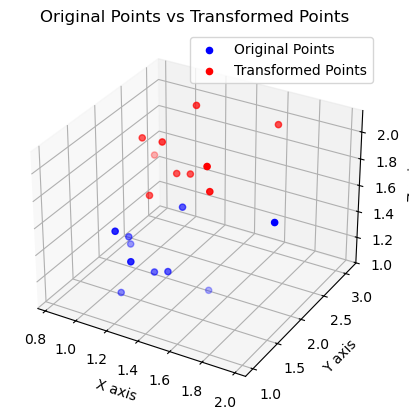

In [3]:
transformed_points = LA.transform_points(transformation_matrix, random_points)
Debug.plot_original_vs_transformed(random_points, transformed_points)

Find transformation from random_points to transformed_points

In [6]:
# Convert transformed_points and random_points to numpy arrays
transformed_points_np = Debug.vectors_to_numpy(transformed_points)
random_points_np = Debug.vectors_to_numpy(random_points)

# Call the function with correct inputs
R, t = LA.point_cloud_registration_least_squares(transformed_points_np, random_points_np)

print("Rotation matrix:", R)
print("Translation vector:", t, "\n")

print("Ground truth: \n", transformation_matrix)

Rotation matrix: [[ 6.12372437e-01 -6.12372469e-01  4.99999958e-01]
 [ 7.07106779e-01  7.07106783e-01  5.08311713e-08]
 [-3.53553393e-01  3.53553329e-01  8.66025428e-01]]
Translation vector: [0.5000001  0.49999992 0.50000005] 

Ground truth: 
 [[ 0.6124 -0.6124  0.5     0.5   ]
 [ 0.7071  0.7071  0.      0.5   ]
 [-0.3536  0.3536  0.866   0.5   ]
 [ 0.      0.      0.      1.    ]]


Proposed point:  Vector(0.92, 2.40, 1.85)
Proposed point:  Vector(1.07, 2.33, 1.89)
Proposed point:  Vector(1.59, 3.09, 1.95)
Proposed point:  Vector(1.21, 2.47, 1.65)
Proposed point:  Vector(1.03, 2.20, 1.51)
Proposed point:  Vector(1.44, 2.14, 1.70)
Proposed point:  Vector(1.18, 2.70, 2.08)
Proposed point:  Vector(0.83, 2.89, 1.54)
Proposed point:  Vector(1.44, 2.09, 1.90)
Proposed point:  Vector(1.14, 2.41, 1.65)
Truth point:  Vector(0.92, 2.40, 1.85)
Truth point:  Vector(1.07, 2.33, 1.89)
Truth point:  Vector(1.59, 3.09, 1.95)
Truth point:  Vector(1.21, 2.47, 1.65)
Truth point:  Vector(1.03, 2.20, 1.51)
Truth point:  Vector(1.44, 2.14, 1.70)
Truth point:  Vector(1.18, 2.70, 2.08)
Truth point:  Vector(0.83, 2.89, 1.54)
Truth point:  Vector(1.44, 2.09, 1.90)
Truth point:  Vector(1.14, 2.41, 1.65)


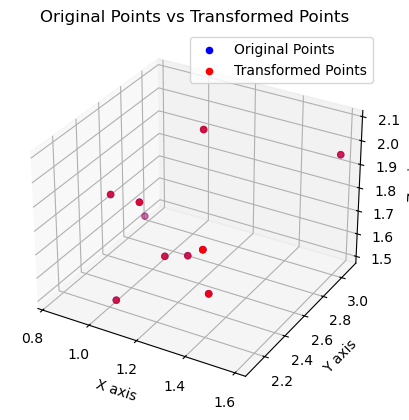

In [16]:
Proposed_transformation_matrix = LA.Frame(R, t)
Proposed_transformed_points = LA.transform_points(Proposed_transformation_matrix, random_points)

for point in Proposed_transformed_points:
    print("Proposed point: " ,point)

for point in transformed_points:
    print("Truth point: ", point)


Debug.plot_original_vs_transformed(transformed_points, Proposed_transformed_points)  